# Vino Verde Dataset 

Téléchargez le dataset winequality-red à partir du drive du cours ou en suivant le lien [wine_data](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) qui vous donne une description plus détaillée des données

1. Importez les librairies usuelles 

In [1]:
import pandas as pd
import seaborn as sns

2. Visualisez le  noms des variables du dataset

In [2]:
df = pd.read_csv('../../src/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


3. Donnez le type de toutes les variables explicatives

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

4. Tracez des graphiques représentant la qualité du vin en fonction de chaque variable explicative prise une a une

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

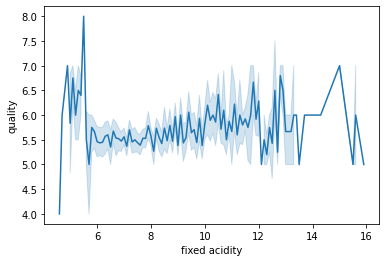

In [4]:
sns.lineplot(data=df, x="fixed acidity", y="quality")

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

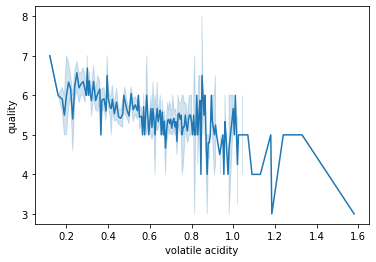

In [5]:
sns.lineplot(data=df, x="volatile acidity", y="quality")

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

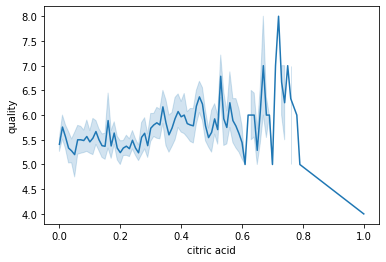

In [6]:
sns.lineplot(data=df, x="citric acid", y="quality")

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

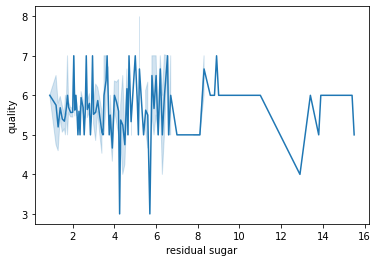

In [7]:
sns.lineplot(data=df, x="residual sugar", y="quality")

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

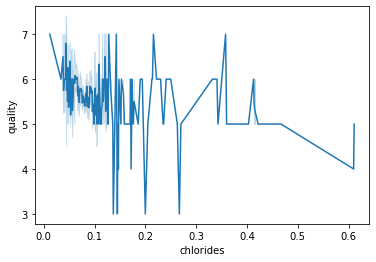

In [8]:
sns.lineplot(data=df, x="chlorides", y="quality")

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

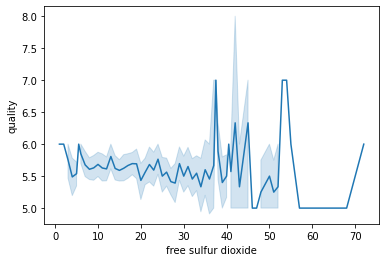

In [9]:
sns.lineplot(data=df, x="free sulfur dioxide", y="quality")

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

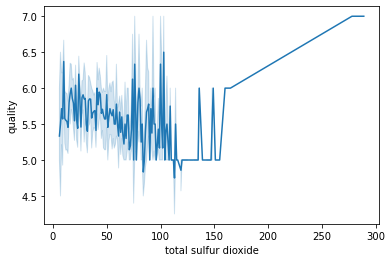

In [10]:
sns.lineplot(data=df, x="total sulfur dioxide", y="quality")

<AxesSubplot:xlabel='density', ylabel='quality'>

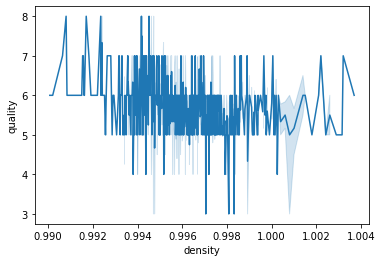

In [11]:
sns.lineplot(data=df, x="density", y="quality")

<AxesSubplot:xlabel='pH', ylabel='quality'>

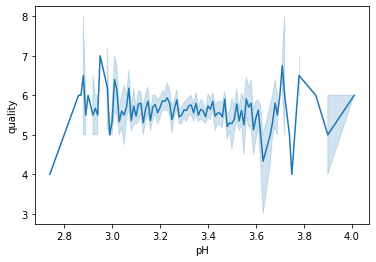

In [12]:
sns.lineplot(data=df, x="pH", y="quality")

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

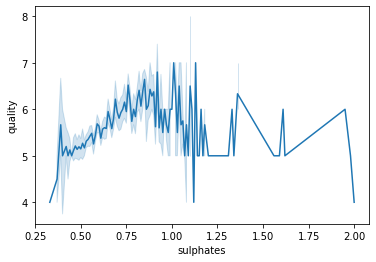

In [13]:
sns.lineplot(data=df, x="sulphates", y="quality")

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

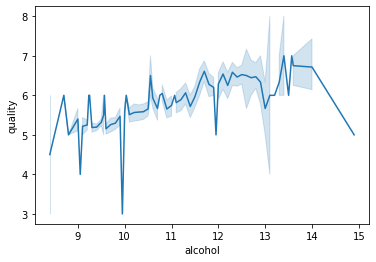

In [14]:
sns.lineplot(data=df, x="alcohol", y="quality")

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

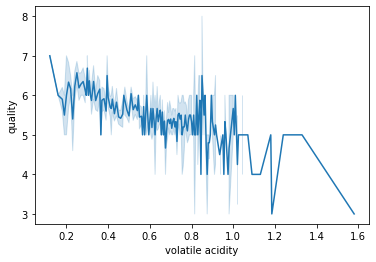

In [15]:
sns.lineplot(data=df, x="volatile acidity", y="quality")

5. Les variables ont elles besoin d’encodage ou de normalisation ? Si oui appliquez l’encodage et la normalisation adaptées

In [30]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

target_variable = "quality"

X = df.loc[:, [column for column in df if column != target_variable]]
y = df.loc[:, [target_variable]]

display(X.describe())

# stratify option ensure a balanced data repartition
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

from sklearn.preprocessing import StandardScaler
sscalerc_x = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

6. Calculez votre score. Qu'en pensez-vous ?

In [32]:
print(f"Train score : {model.score(X_train, Y_train)}, Test score : {model.score(X_test, Y_test)}")

Train score : 0.6004691164972635, Test score : 0.61875


7. Faites une cross_validation pour vérifier ce score 

In [33]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, KFold

cross_val_score(model, X, y.values.ravel(), cv=KFold(10, shuffle=True, random_state=0)).mean()

0.578494496855346

8. Créez un ```y_pred``` qui va être la prédiction pour les valeurs de ```X_test```

In [34]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

9. Créez une matrice de confusion pour voir où vous vous êtes le plus trompé. Mettez celle-ci dans une heatmap

<AxesSubplot:>

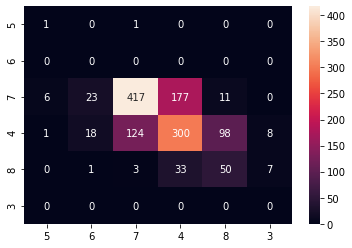

In [35]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_pred_train, Y_train), 
            xticklabels=df.quality.unique(),
            yticklabels=df.quality.unique(),
            annot=True, fmt="d")

<AxesSubplot:>

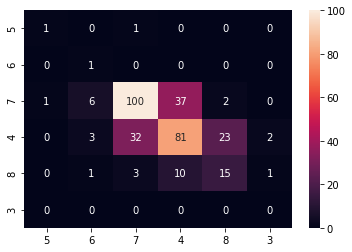

In [36]:
sns.heatmap(confusion_matrix(y_pred, Y_test), 
            xticklabels=df.quality.unique(),
            yticklabels=df.quality.unique(),
            annot=True, fmt="d")

10. Regardez la note qui revient le plus souvent dans votre dataset 

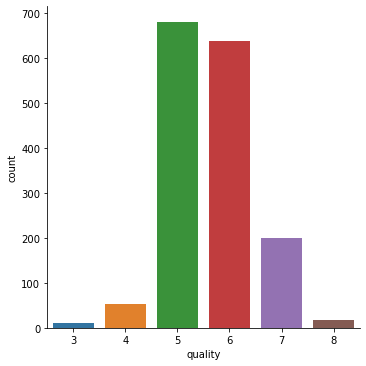

In [37]:
sns.catplot(data=df, x="quality", kind="count")

11. Quel serait votre score si vous avez toujours prédit la valeur 5 ?

In [38]:
import numpy as np

y_pred_5 = np.array([5] * len(y_pred))

<AxesSubplot:>

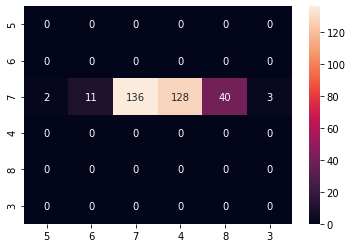

In [39]:
# Baseline to compare with previous model

sns.heatmap(confusion_matrix(y_pred_5, Y_test), 
            xticklabels=df.quality.unique(),
            yticklabels=df.quality.unique(),
            annot=True, fmt="d")

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_5, Y_test)

0.425

12. Que pouvez vous conclure sur la qualité de votre modèle ? 

better than baseline

13. Classez maintenant les features les importantes selon votre modèle. Pour cela on pourra s'aider de la métrique Chi2 

Vous pourrez trouver plus de détails dans [scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

In [47]:
from sklearn.feature_selection import chi2
chi2_score, p_value = chi2(X, y)

14. Mettez ces valeurs dans un DataFrame pour mieux comprendre ces valeurs 

In [49]:
coefficients = pd.DataFrame(index=X.columns, data={'Chi2 Score': chi2_score, "p-value": p_value}).sort_values(by = ['Chi2 Score'], ascending=False)
coefficients

,Chi2 Score,p-value
total sulfur dioxide,2755.557984,0.000000e+00
free sulfur dioxide,161.936036,3.827288e-33
alcohol,46.429892,7.424038e-09
volatile acidity,15.580289,8.150352e-03
citric acid,13.025665,2.313944e-02
fixed acidity,11.260652,4.645004e-02
sulphates,4.558488,4.720963e-01
residual sugar,4.123295,5.318047e-01
chlorides,0.752426,9.799680e-01
pH,0.154655,9.995265e-01


15. Pour terminer, mettez ces variables dans un bar chart

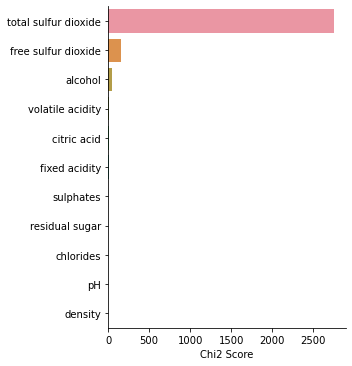

In [56]:
sns.catplot(x='Chi2 Score', y=coefficients.index, data = coefficients, kind="bar")